<a href="https://colab.research.google.com/github/emmanuelssilva/AtividadeRedpill/blob/main/Projeto_Redpill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Conexão com o Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/archive/Books.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/archive/Ratings.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/archive/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Books.csv
df1.shape

(271360, 8)

In [ ]:
# Ratings.csv
df2.shape

(1149780, 3)

In [ ]:
# Users.csv
df3.shape

(278858, 3)

In [ ]:
display(df1)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
columns = ['Image-URL-S', 'Image-URL-L', 'Image-URL-M']
df1.drop(columns, inplace=True, axis=1)

In [ ]:
display(df1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
display(df2)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
display(df3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


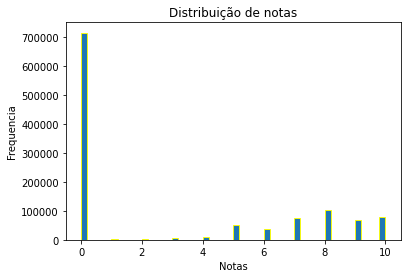

In [ ]:
# Vamos observar a distribuição das notas
plt.hist(df2["Book-Rating"], 50, lw = 0.89, ec = 'yellow')
plt.xlabel('Notas')
plt.ylabel('Frequencia')
plt.title('Distribuição de notas')
plt.show()

In [ ]:
df3.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
dffinal = pd.merge(df1,df2)
dffinal.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [ ]:
dffinal = dffinal.rename(columns={'Book-Title': 'title', 'User-ID': 'user', 'Book-Rating': 'rating'})

In [ ]:
dffinal.head()

,ISBN,title,Book-Author,Year-Of-Publication,Publisher,user,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [ ]:
# Selecionamos os titulos com mais de 5000 avaliações.
df_new = dffinal.groupby("title").filter(lambda x: x['rating'].count()>= 500)
df_new.shape

(25346, 7)

In [ ]:
# Criamos um novo dataset com os titulos com a média das avaliações
df_ratings = pd.DataFrame(df_new.groupby('title').rating.mean())

In [ ]:
# Adicionamos uma coluna com a quantidade de avaliações
df_ratings['Ratings'] = df_new.groupby('title').rating.count()

In [ ]:
# Agora ordenamos o top 5 titulos pela quantidade de avaliações
df_ratings.sort_values(by = 'Ratings', ascending = False).head(10)

,rating,Ratings
title,,
Wild Animus,2502,2502
The Lovely Bones: A Novel,1295,1295
The Da Vinci Code,898,898
A Painted House,838,838
The Nanny Diaries: A Novel,828,828
Bridget Jones's Diary,815,815
The Secret Life of Bees,774,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740
The Red Tent (Bestselling Backlist),723,723


In [ ]:
global_media = df_ratings['Ratings'].mean() # Média Global de avaliações
lim_inf = df_ratings.rating.min() # Limite minimo para estar na recomendação

# Função de média ponderada
def weighted_rating (x, m = lim_inf, C = global_media):
    v = x['Ratings']
    R = x['rating']
    return (v/(v + m) * R) + (m/(m+v) * C)

In [ ]:
df_ratings['score'] = df_ratings.apply(weighted_rating, axis=1) # adiciona uma coluna com a nota media ponderada de avaliações
df_ratings.sort_values(by='score', ascending=False).head(15) # Apresenta as top 15 Titulos mais populares

,rating,Ratings,score
title,,,
Wild Animus,2502,2502,2198.868645
The Lovely Bones: A Novel,1295,1295,1124.846069
The Da Vinci Code,898,898,821.731623
A Painted House,838,838,780.763660
The Nanny Diaries: A Novel,828,828,774.102739
Bridget Jones's Diary,815,815,765.519408
The Secret Life of Bees,774,774,739.038855
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740,717.807043
The Red Tent (Bestselling Backlist),723,723,707.457141
